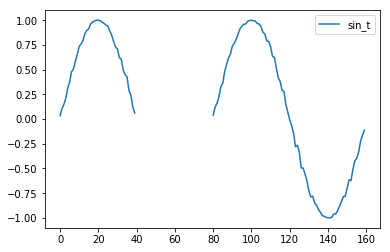

In [14]:
import keras
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df["sin_t"] = df["sin_t"].drop(range(40,80))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [15]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)

In [16]:
length_of_sequences = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev =length_of_sequences) 

/Users/noriakioshita/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/noriakioshita/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [17]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05) 

/Users/noriakioshita/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 3325 samples, validate on 176 samples
Epoch 1/15
3325/3325 [==============================] - 23s 7ms/step - loss: nan - val_loss: nan
Epoch 2/15
3325/3325 [==============================] - 22s 7ms/step - loss: nan - val_loss: nan
Epoch 3/15
3325/3325 [==============================] - 20s 6ms/step - loss: nan - val_loss: nan
Epoch 4/15
3325/3325 [==============================] - 20s 6ms/step - loss: nan - val_loss: nan
Epoch 5/15
3325/3325 [==============================] - 20s 6ms/step - loss: nan - val_loss: nan
Epoch 6/15
3325/3325 [==============================] - 19s 6ms/step - loss: nan - val_loss: nan
Epoch 7/15
3325/3325 [==============================] - 19s 6ms/step - loss: nan - val_loss: nan
Epoch 8/15
3325/3325 [==============================] - 19s 6ms/step - loss: nan - val_loss: nan
Epoch 9/15
3325/3325 [==============================] - 19s 6ms/step - loss: nan - val_loss: nan
Epoch 10/15
3325/3325 [==============================] - 19s 6ms/step - loss: na

In [23]:
# early stopping
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

#model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05, callbacks=[early_stopping]) 
model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05) 

/Users/noriakioshita/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 3325 samples, validate on 176 samples
Epoch 1/15
3325/3325 [==============================] - 21s 6ms/step - loss: nan - val_loss: nan
Epoch 2/15
3325/3325 [==============================] - 21s 6ms/step - loss: nan - val_loss: nan
Epoch 3/15
3325/3325 [==============================] - 20s 6ms/step - loss: nan - val_loss: nan
Epoch 4/15
3325/3325 [==============================] - 21s 6ms/step - loss: nan - val_loss: nan
Epoch 5/15
3325/3325 [==============================] - 19s 6ms/step - loss: nan - val_loss: nan
Epoch 6/15
3325/3325 [==============================] - 22s 7ms/step - loss: nan - val_loss: nan
Epoch 7/15
3325/3325 [==============================] - 21s 6ms/step - loss: nan - val_loss: nan
Epoch 8/15
3325/3325 [==============================] - 20s 6ms/step - loss: nan - val_loss: nan
Epoch 9/15
3325/3325 [==============================] - 19s 6ms/step - loss: nan - val_loss: nan
Epoch 10/15
3325/3325 [==============================] - 19s 6ms/step - loss: na

KeyboardInterrupt: 

In [ ]:
predicted = model.predict(X_test) 

dataf = pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

In [22]:
predicted[:200]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [10]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot, plot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ModuleNotFoundError: No module named 'keras.utils.visualize_util'